In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import rc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Read our preprocessed data into a pandas df
MyRegion = pd.read_csv('Data/Cleaned_Filtered_Data.csv')

In [3]:
#Split Features and target
X = MyRegion[['age','odometer','Condition','Type','Manufacturer','Cylinders',"Transmission",'Model']].astype(int)

Y = MyRegion['price'].astype(int)


In [109]:
#X.dropna(inplace=True)
#Y.dropna(inplace=True)

In [6]:
#use sklearn feature train_test_split to separate our dataset into a train and test set for both our dependant and ind
#variables. A test sample size of 10% was used. Then fit a linear regression model using sklearn and predict Y for x test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .10, random_state = 40)

MyRegModel = linear_model.LinearRegression()
MyRegModel.fit(X_train, Y_train)
predicted = MyRegModel.predict(X_test)

In [8]:
#The highest R2 value we are able to achieve with this dataset using these methods is .65. In other words,
#the features we have present are able to generate a model which can account for 65% of the variation in the price of a used
#car.
MyRegModel.score(X_train, Y_train)

0.6518710542393331

In [9]:
MyRegModel.score(X_test, Y_test)

0.6530906677590582

In [14]:
#Explore the results further using the statsmodels output detailed in class
import statsmodels.api as sm

X = X_train
y = Y_train
X = sm.add_constant(X)
mod = sm.OLS(y, X.astype(float), hasconst= True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     1996.
Date:                Mon, 21 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:46:54   Log-Likelihood:                -85016.
No. Observations:                8535   AIC:                         1.700e+05
Df Residuals:                    8526   BIC:                         1.701e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.148e+04    376.092     30.535   

A similar R squared value is noted. We are also able to see that the variables for condition and model do not contribute signifigantly to our model.

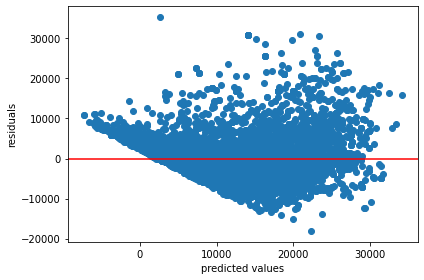

In [15]:
#Diagnosing the linear model using the below residual plot, it appears that our points are indeed random.
residuals = res.resid

y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

In [21]:
#Fun example using the Model. we create a new df containing some info for a potential vehicle purchase. If we decode this 
#back into its original values we find that it is a: 2015 BMW 6 series with 30k miles.

data = [[5,30000,4,8,21,6,2,106]]
Example = pd.DataFrame(data, columns = X_test.columns)
Example


,age,odometer,Condition,Type,Manufacturer,Cylinders,Transmission,Model
0,5,30000,4,8,21,6,2,106


In [22]:
#Our model predicts that this vehicle is worth approximately $23,000. 
MyRegModel.predict(Example)

array([22977.01684321])

To validate this, I ran a quick lookup on Kelly Blue Book, a company which values used vehicles. The results can be found below! Our model was pretty close in this case!

<img src="Images/KBB_Example1.PNG">


# Exploring Data Relationships and Visualizations

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


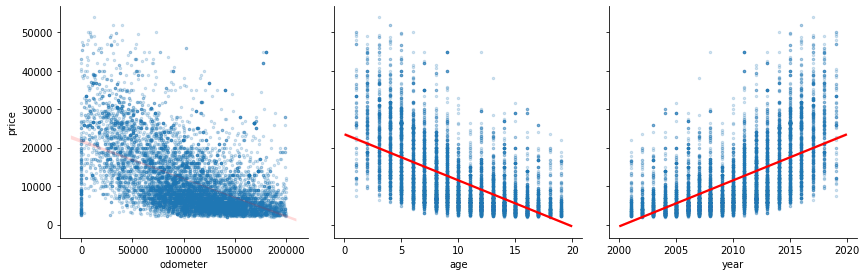

In [42]:
#Below we see a comparison of the relationship strength of the continuous varibles to target in the dataset.
g = sns.PairGrid(MyRegion, y_vars=["price"], x_vars=["odometer", "age","year"], height=4)
g.map(sns.regplot,fit_reg = True, line_kws={'color': 'red'},scatter_kws={'s': 6, 'alpha': 0.2})
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


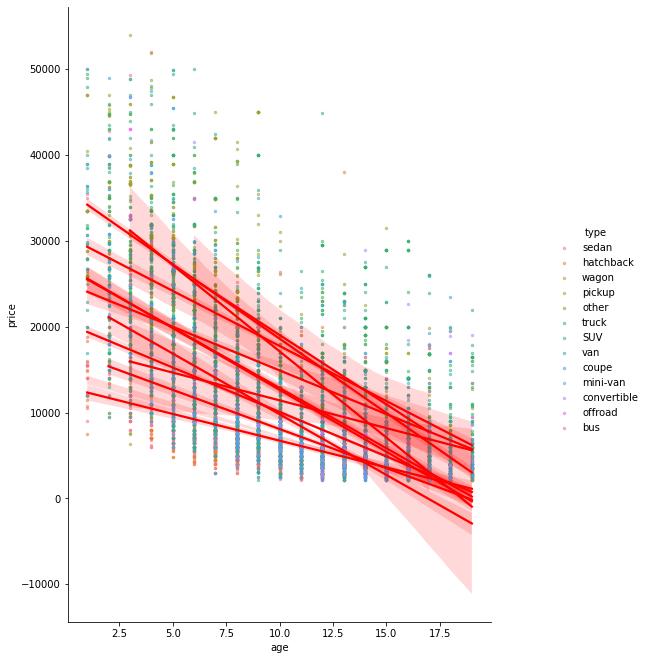

In [60]:
#It was further explored to see if these relationships changed based on a filtering/grouping of some of the categorical veriables.
#no variations were noted.The below is a single example to see if the age/price relationship changed by vehicle type.
plt.rcParams["figure.figsize"] = (14,10)
g=sns.lmplot(x = 'age', y = 'price', data = MyRegion,hue='type',fit_reg = True, truncate=True,line_kws={'color': 'red'},scatter_kws={'s': 6, 'alpha': 0.5})
g.fig.set_size_inches(10,10)
plt.draw()

C:\Users\cyeager\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


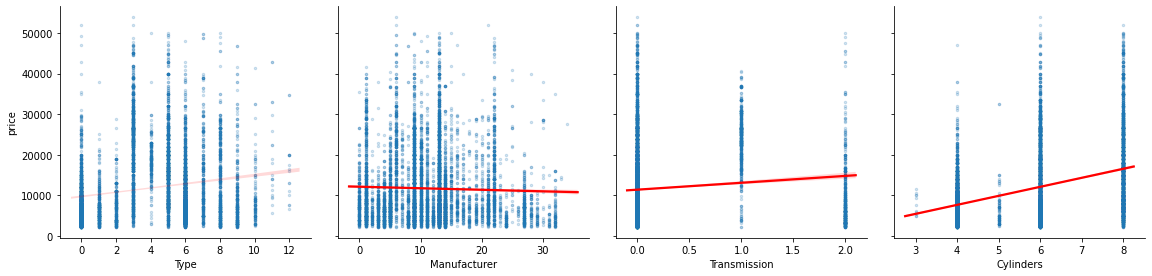

In [50]:
#Below we see a comparison of the relationship strength of the categorical varibles to target in the dataset.
#note we've omitted the varibles which the model noted as having P values which were not signifigant. 
g = sns.PairGrid(MyRegion, y_vars=["price"], x_vars=["Type", "Manufacturer","Transmission",'Cylinders'], height=4)
g.map(sns.regplot,fit_reg = True, line_kws={'color': 'red'},scatter_kws={'s': 6, 'alpha': 0.2})
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])

The scatterplots below show the predicted values of Y overlayed with the actual values within the test set. Some of the visual similarity observed is promising.

Text(0.5, 1.0, 'Comparison of Model Output for Vehicle Age to Test Data')

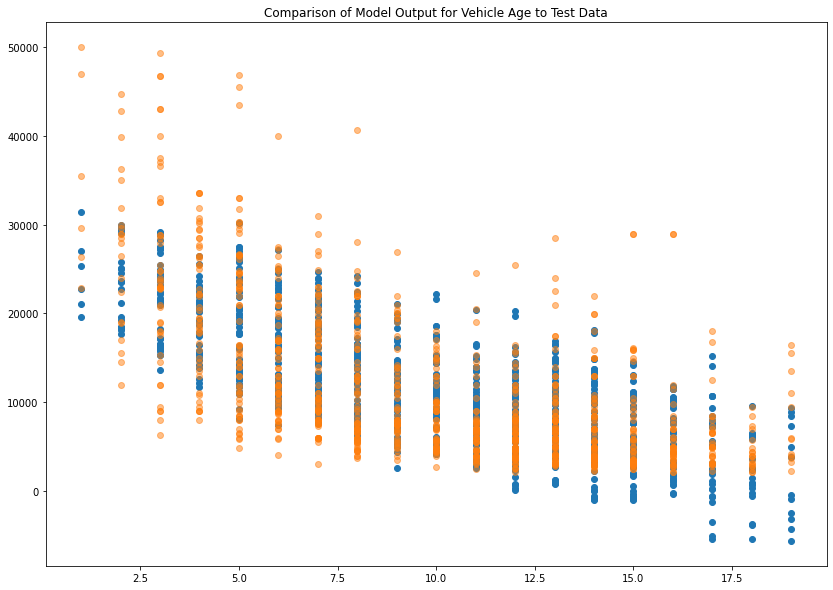

In [53]:
plt.scatter(X_test.age,predicted)
plt.scatter(X_test.age,Y_test, alpha=.5)
plt.title("Comparison of Model Output for Vehicle Age to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Milage to Test Data')

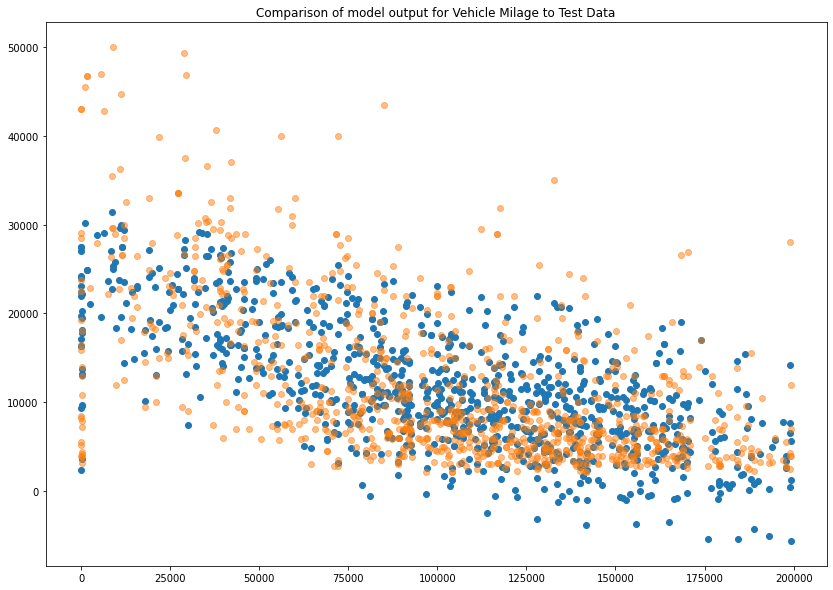

In [54]:
plt.scatter(X_test.odometer,predicted)
plt.scatter(X_test.odometer,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Milage to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Type to Test Data')

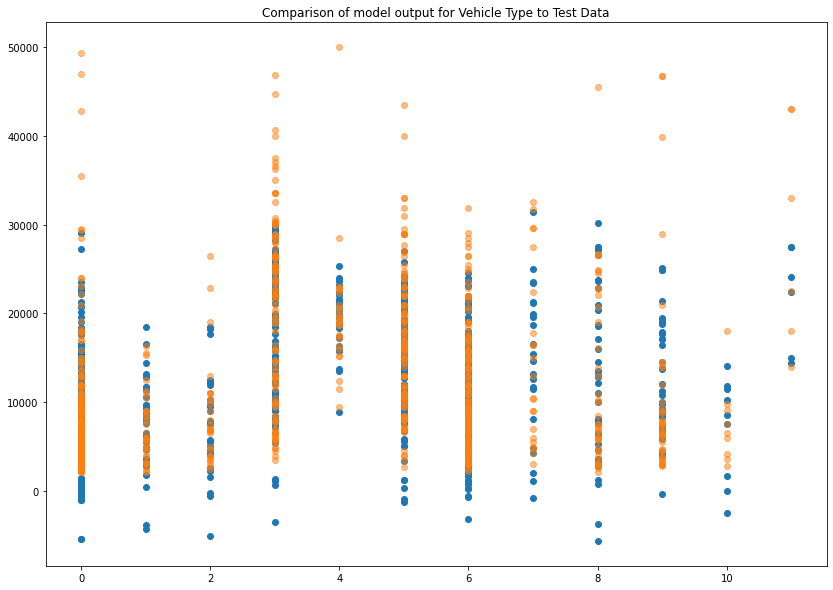

In [55]:
plt.scatter(X_test.Type,predicted)
plt.scatter(X_test.Type,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Type to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Make to Test Data')

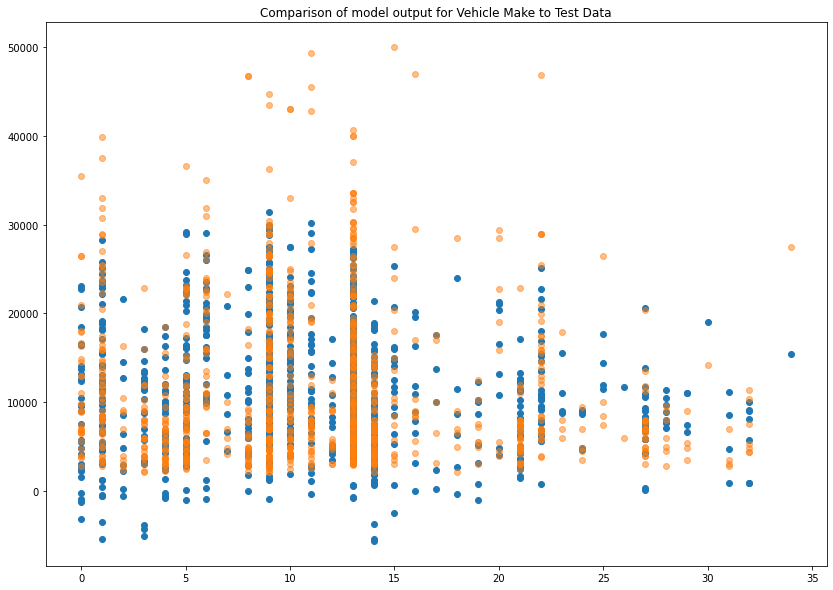

In [56]:
plt.scatter(X_test.Manufacturer,predicted)
plt.scatter(X_test.Manufacturer,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Make to Test Data")

Text(0.5, 1.0, 'Comparison of model output for Vehicle Transmission to Test Data')

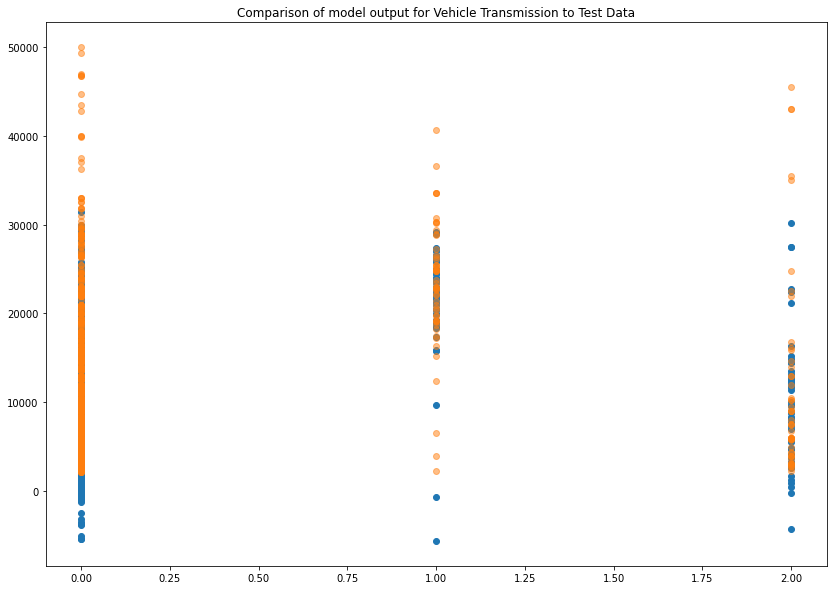

In [58]:
plt.scatter(X_test.Transmission,predicted)
plt.scatter(X_test.Transmission,Y_test, alpha=.5)
plt.title("Comparison of model output for Vehicle Transmission to Test Data")